In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/train'
VALIDATION_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/val'
TEST_DATA_DIR = '/home/lab12/data/산불 이미지 데이터/test'

TRAIN_SAMPLES = 3334 # train의 이미지 갯수
VALIDATAION_SAMPLES = 199 # validation의 이미지 갯수
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224

params = {
    'batch_size' : [32],
    'learning_rate' : [0.00001]
}

In [34]:
# vgg16 = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
# vgg16.summary()

In [43]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))
 
    for layer in base_model.layers[:]:
        layer.trainable = False
 
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)    
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    custom_model = Dense(16, activation='relu')(custom_model)
    custom_model = Dense(8, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

In [37]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [44]:
model_final = model_maker()

19


In [6]:
        train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              rotation_range=20,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2)

        val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [39]:
for batch_size in params['batch_size']:
    for lr in params['learning_rate'] :
        
        model_final.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(lr),
                   metrics=['acc'])
        
        train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              rotation_range=20,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2)

        val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

        train_generator = train_datagen.flow_from_directory(TRAIN_DATA_DIR,
                                                          classes=['fire', 'non_fire'],
                                                          target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                          batch_size=batch_size,
                                                          shuffle=True,
                                                          seed=12345,
                                                          class_mode='categorical')

        validation_generator = val_datagen.flow_from_directory(
                VALIDATION_DATA_DIR,
                classes=['fire', 'non_fire'],
                target_size=(IMG_WIDTH, IMG_HEIGHT),
                batch_size=batch_size,
                shuffle=True,
                seed=12345,
                class_mode='categorical')
        
#         history = model_final.fit(train_generator,
#                     steps_per_epoch=TRAIN_SAMPLES//batch_size,
#                     epochs=100,
#                     validation_data=validation_generator,
#                     validation_steps=VALIDATAION_SAMPLES//batch_size,
#                     callbacks=callback)
        
#         plt.plot(history.history['loss'])
#         plt.plot(history.history['val_loss'])
#         plt.xlabel('epoch')
#         plt.ylabel('loss')
#         plt.legend(['train','val'])
#         plt.show()

#         plt.plot(history.history['acc'])
#         plt.plot(history.history['val_acc'])
#         plt.xlabel('epoch')
#         plt.ylabel('accuracy')
#         plt.legend(['train','val'])
#         plt.show()

Found 3334 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/100


ValueError: in user code:

    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 7, 7, 2) vs (None, None)).


In [24]:
# model_final.save('/home/lab12/fire_classification_model_859.h5')

In [2]:
model = tf.keras.models.load_model('./fire_classification_model_dense2.h5')

In [7]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=64,
    shuffle=True,
    class_mode='categorical')

Found 195 images belonging to 2 classes.


In [8]:
score = model.evaluate(test_generator, steps=195 // 64)

3/3 [==============================] - 33s 8s/step - loss: 0.4629 - acc: 0.8177


In [9]:
print('정답률 = ', score[1],'loss=', score[0])

정답률 =  0.8177083134651184 loss= 0.46286603808403015


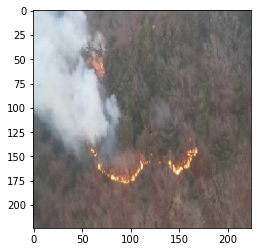

In [31]:
img_path = '/home/lab12/data/산불 이미지 데이터/test/fire/naver_0000.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [33]:
prediction = model.predict(preprocessed_img)
print(np.array(prediction))

[[0.74078935 0.2592107 ]]


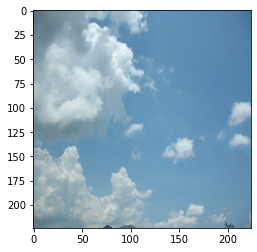

In [34]:
img_path = '/home/lab12/data/산불 이미지 데이터/test/non_fire/00000001.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [35]:
prediction = model.predict(preprocessed_img)
print(np.array(prediction))

[[0.79791164 0.2020883 ]]


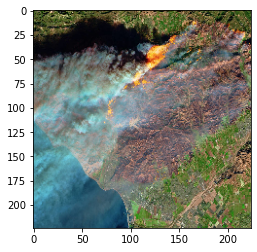

In [36]:
img_path = '/home/lab12/data/산불 이미지 데이터/val/fire/fire.651.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [37]:
prediction = model.predict(preprocessed_img)
prediction

array([[0.80716014, 0.19283982]], dtype=float32)

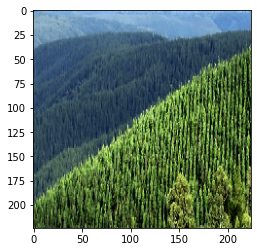

In [38]:
img_path = '/home/lab12/data/산불 이미지 데이터/val/non_fire/non_fire.151.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [39]:
prediction = model.predict(preprocessed_img)
prediction

array([[0.6680715, 0.3319285]], dtype=float32)